In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('./regression_df.csv')

In [3]:
size_b = data.memory_usage(deep=True).sum()
size_mb = size_b / (1024 * 1024)
print(f"Size data: {size_mb:.2f} Mb")

Size data: 0.18 Mb


In [4]:
data.head(8)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
5,6,"De Wittenkade 134 I, Amsterdam",1051 AM,450000.0,53,2,4.875024,52.382228
6,7,"Pruimenstraat 18 B, Amsterdam",1033 KM,450000.0,87,3,4.896536,52.410585
7,8,"Da Costakade 32 II, Amsterdam",1053 WL,590000.0,80,2,4.871555,52.371041


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [6]:
print(
    f"{data.isna().sum()} ({data.isna().sum().sum()/data.shape[0]*data.shape[1]:.2f}%) of missing values"
)

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64 (0.03%) of missing values


In [7]:
# don't loose NaN rows information, save into a dataset
mask = data.isnull().any(axis=1)
nan_rows = data[mask]
nan_rows.to_csv('nan_rows.csv', index=False)

In [8]:
# now drop NaN rows for split
data = data.dropna()

In [9]:
# the least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2
value_counts = data['Price'].value_counts()
value_counts_1 = value_counts[value_counts == 1]
print('Least Populated Class with 1 value is',value_counts_1.count(), 'over 924 entries')
print(round((value_counts_1.count() / 924)*100, 2), '%')

Least Populated Class with 1 value is 108 over 924 entries
11.69 %


In [10]:
data['Price'].max() # 5'950'000 €

5950000.0

In [11]:
data['Price'].min() # 175'000 €

175000.0

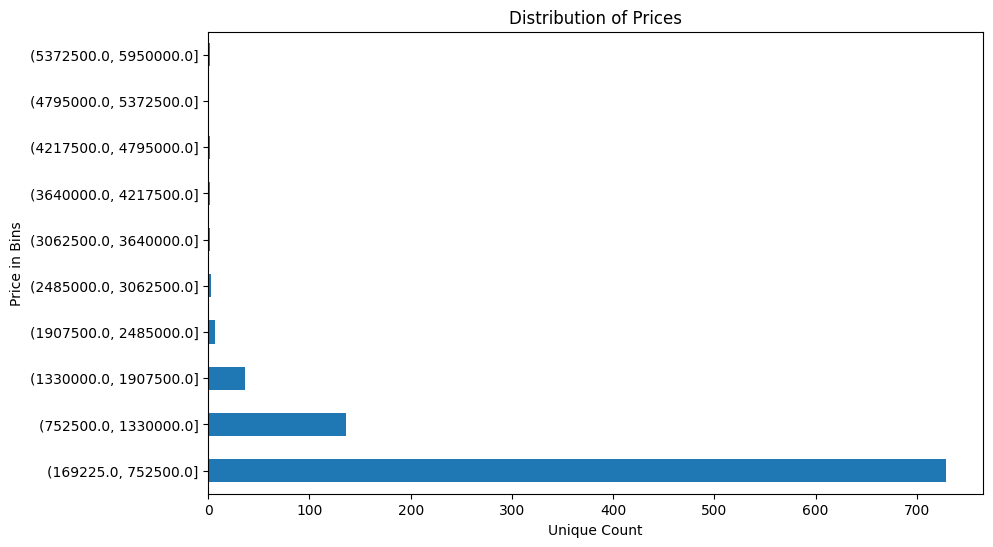

In [16]:
num_bins = 10
bin_edges = pd.cut(data['Price'], bins=num_bins)

# Compute the bin counts
bin_counts = bin_edges.value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='barh')
plt.xlabel('Unique Count')
plt.ylabel('Price in Bins')
plt.title('Distribution of Prices')
plt.show()

In [19]:
TARGET = 'Price'
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=[TARGET]),
                                                    data[TARGET],
                                                    test_size=0.2,
                                                    stratify=data[TARGET],
                                                    random_state=42)


data_train = pd.merge(left=y_train, right=X_train, left_index=True, right_index=True)
data_test = pd.merge(left=y_test, right=X_test, left_index=True, right_index=True)


print(len(data_train))
print(len(data_test))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.